# Sheet 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F
from torchsummary import summary


## 2 Projection Trick

(a)

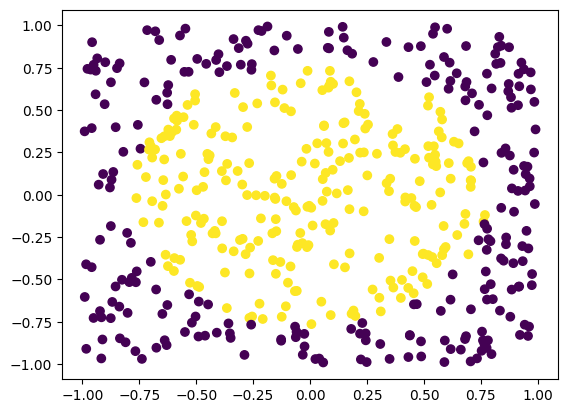

In [2]:
# Load the data
xy = np.load('data03/data2d.npy')
labels = np.load('data03/labels.npy')

# TODO: Plot the data
plt.scatter(xy[:,0], xy[:,1], c=labels)

0.558


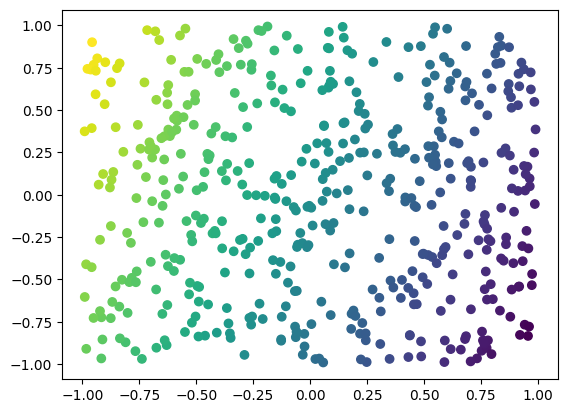

In [3]:
from sklearn.linear_model import LogisticRegression
# TODO: fit logistic regression]
clf = LogisticRegression().fit(xy, labels)

# TODO: compute the accuracy
print(clf.score(xy, labels))

# TODO: visualize the decision boundary
plt.scatter(xy[:,0], xy[:,1], c=clf.decision_function(xy))

This problem can't be solved with the projection trick, because the set of points is not convex. <br>
The accuracy of the fit is with $0.558$ close to just random guessing.

(b)

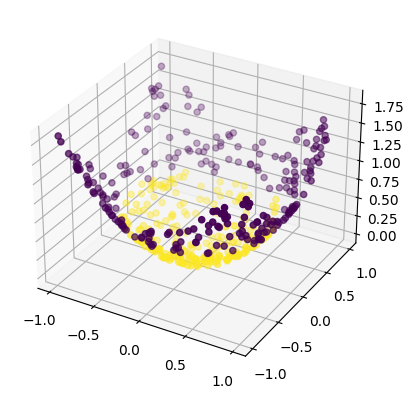

In [4]:
# TODO: Come up with a nonlinear tranformation for the third feature. Compute it and concatenate to the data.
z = xy[:,0]**2 + xy[:,1]**2
xyz = np.concatenate((xy, z[:,None]), axis=1)

# TODO: Show the enhanced data, e.g. with a 3D scatter plot 
#       (https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c=labels)

0.99


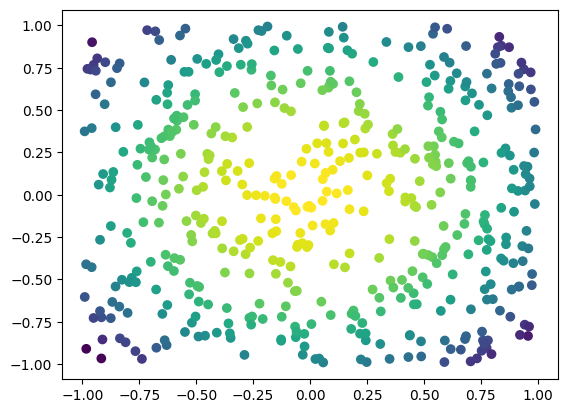

In [5]:
# TODO: again, fit and evaluate logistic regression
clf2 = LogisticRegression().fit(xyz, labels)
print(clf2.score(xyz, labels))
plt.scatter(xyz[:,0], xyz[:,1], c=clf2.decision_function(xyz))

If we enhance the problem to a 3D feature space, we can use the projection trick and increase the accuracy to $0.99$.

(c) <br>
The problem can be solved by an MLP with a single hidden layer, because the hidden layer can be used to project the data into a higher dimensional space, where the data is linearly separable. The output layer can then be used to project the data back into the original space.


## 3) Linear regions of MLPs

(a)

In [6]:
# TODO: define NN architecture

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 20)
        self.fc2 = nn.Linear(20, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

my_nn = Net()
summary(my_nn, (2,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 20]              60
            Linear-2                    [-1, 1]              21
Total params: 81
Trainable params: 81
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


There are a total of 81 parameters in this model with one hidden layer and 20 neurons.

(b)

In [7]:
# TODO: instantiate the model and make the visualizations as requested in the task
def print_init(range, density, my_nn):
    limit_1 = -range
    limit_2 = range
    grid_density = density
    x = np.linspace(limit_1, limit_2, grid_density)
    y = np.linspace(limit_1, limit_2, grid_density)

    xx, yy = np.meshgrid(x, y)
    xy = np.stack((xx.flatten(), yy.flatten()), axis=1)
    xy = torch.from_numpy(xy).float()
    out = my_nn(xy)
    out = out.detach().numpy().reshape((grid_density,grid_density))

    plt.imshow(out, extent=[limit_1, limit_2, limit_1, limit_2])
    plt.show()

    return out

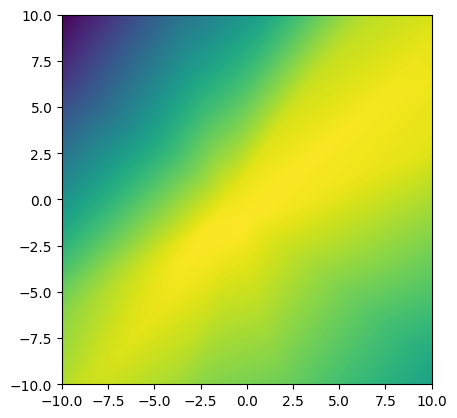

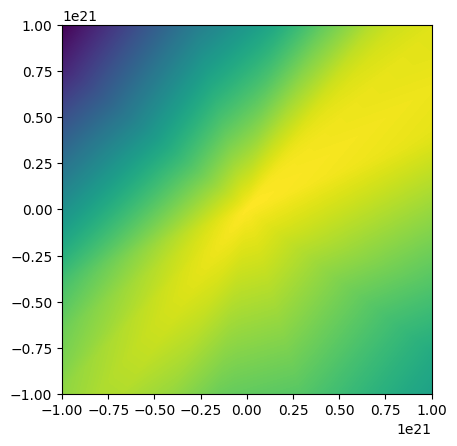

In [8]:
print_init(10, 500, my_nn)
out = print_init(10e20, 500, my_nn)

There is no difference in zooming the frame out. <br>
It looks like the random initialization is giving a linear decision boundary through the origin.

(c)

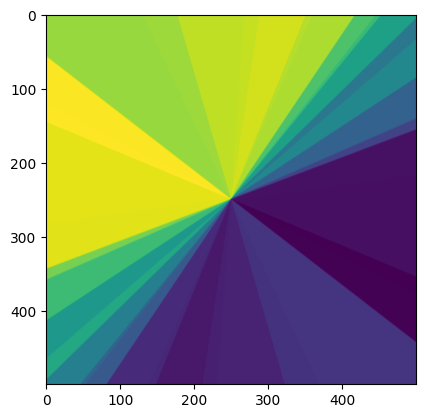

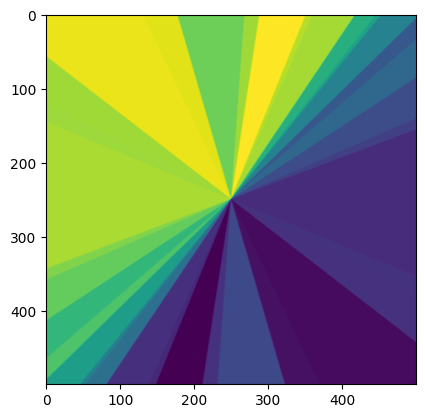

In [14]:
def plot_grad(network_output):
    grad = np.gradient(out)
    for i in range(len(grad)):
        plt.imshow(grad[i])
        plt.show()

plot_grad(out)    


(d)

In [15]:
# TODO: define NN architecture

class Net_big(nn.Module):
    def __init__(self):
        super(Net_big, self).__init__()
        self.fc1 = nn.Linear(2, 5)
        self.fc2 = nn.Linear(5, 5)
        self.fc3 = nn.Linear(5, 5)
        self.fc4 = nn.Linear(5, 5)
        self.fc5 = nn.Linear(5, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.relu(x)
        x = self.fc5(x)
        return x

my_nn_big = Net_big()
summary(my_nn_big, (2,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 5]              15
            Linear-2                    [-1, 5]              30
            Linear-3                    [-1, 5]              30
            Linear-4                    [-1, 5]              30
            Linear-5                    [-1, 1]               6
Total params: 111
Trainable params: 111
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


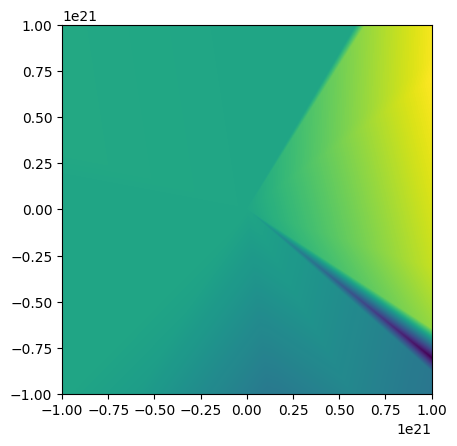

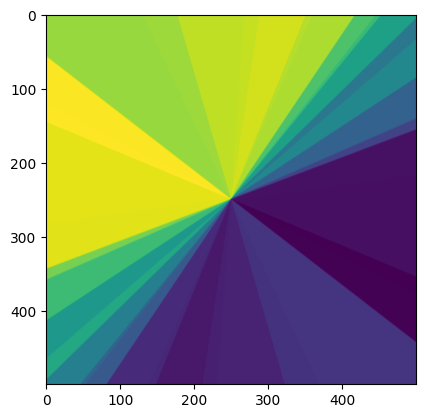

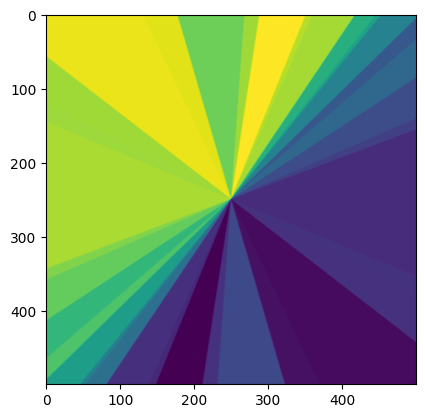

In [16]:
# TODO: instantiate the model and make the visualizations as requested in the task

out_big = print_init(10e20, 500, my_nn_big)
plot_grad(out_big)